# Project Heading

# ***PROJECT-1-Customer Segmentation using K-Means Clustering (Mall Customers Dataset)***



# 1.Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle


# 2️.Load Dataset

In [119]:
data = pd.read_csv("C:/Users/Visla/Downloads/Mall_Customers.csv")


In [120]:
data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [121]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [122]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 3️.Data Understanding

In [123]:
print("Shape of dataset:", data.shape)



Shape of dataset: (200, 5)


In [124]:
print("\nData Info:")



Data Info:


In [125]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [126]:

print("\nMissing Values:")



Missing Values:


In [127]:

print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# 4️.Data Visualization



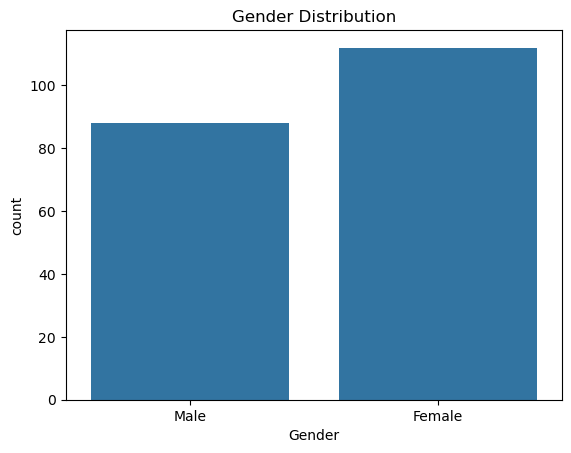

In [128]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()



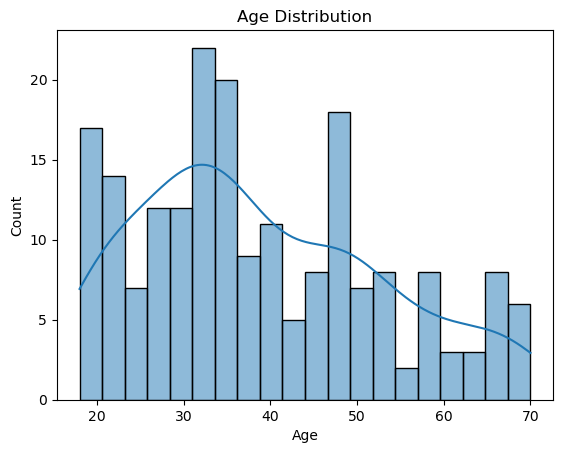

In [129]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


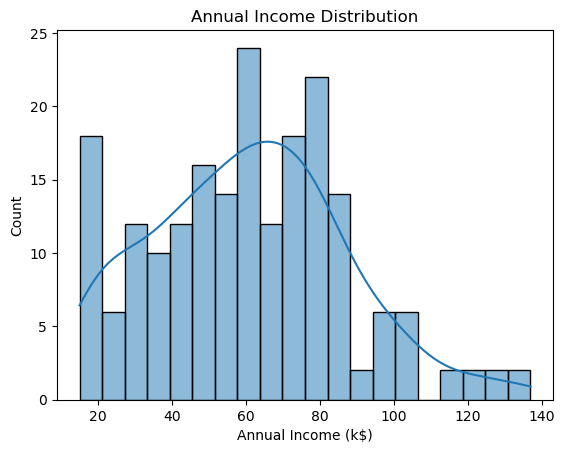

In [130]:
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()



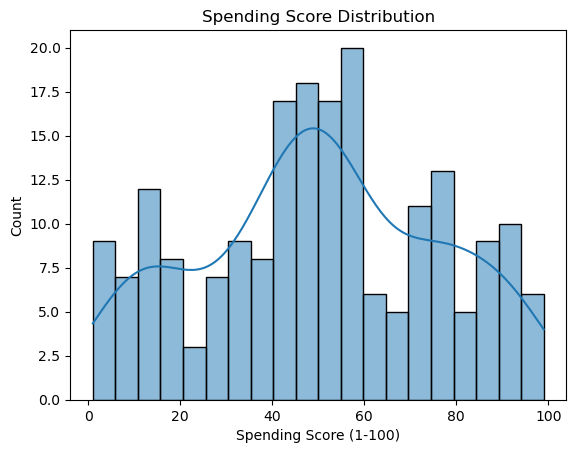

In [131]:
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# 5.Feature Selection

In [132]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


# 6.Elbow Method to find optimal clusters

In [133]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


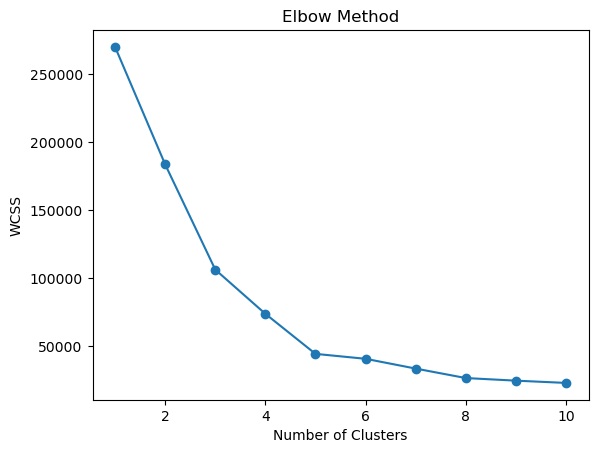

In [134]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 7️.K-Means Clustering


In [135]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster column to dataset
data['Cluster'] = y_kmeans


In [136]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# 8️.Visualizing the Clusters

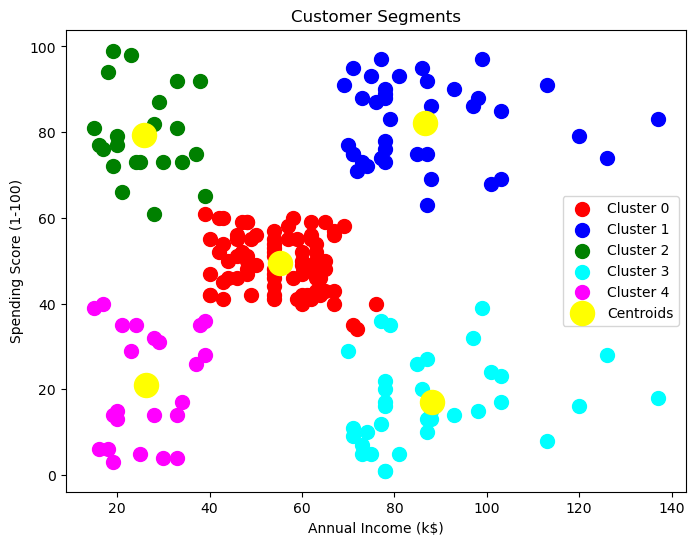

In [137]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(
        X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1],
        s=100, c=colors[i], label=f'Cluster {i}'
    )

plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    s=300, c='yellow', label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Pie chart of cluster distribution

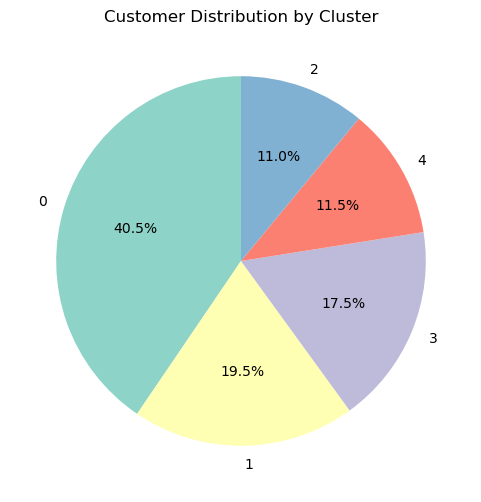

In [138]:
# 📊 Pie chart of customer distribution per cluster
cluster_counts = data['Cluster'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Customer Distribution by Cluster")
plt.show()


# 9️.Cluster Analysis

In [139]:
for i in range(5):
    print(f"\nCluster {i} Summary:")
    print(data[data['Cluster'] == i].describe())


Cluster 0 Summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster  
count     81.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 Summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.0000

# 10.Results

In [140]:
data.to_csv('Mall_Customers_with_clusters.csv', index=False)
print("\nClustered dataset saved as 'Mall_Customers_with_clusters.csv'")


Clustered dataset saved as 'Mall_Customers_with_clusters.csv'


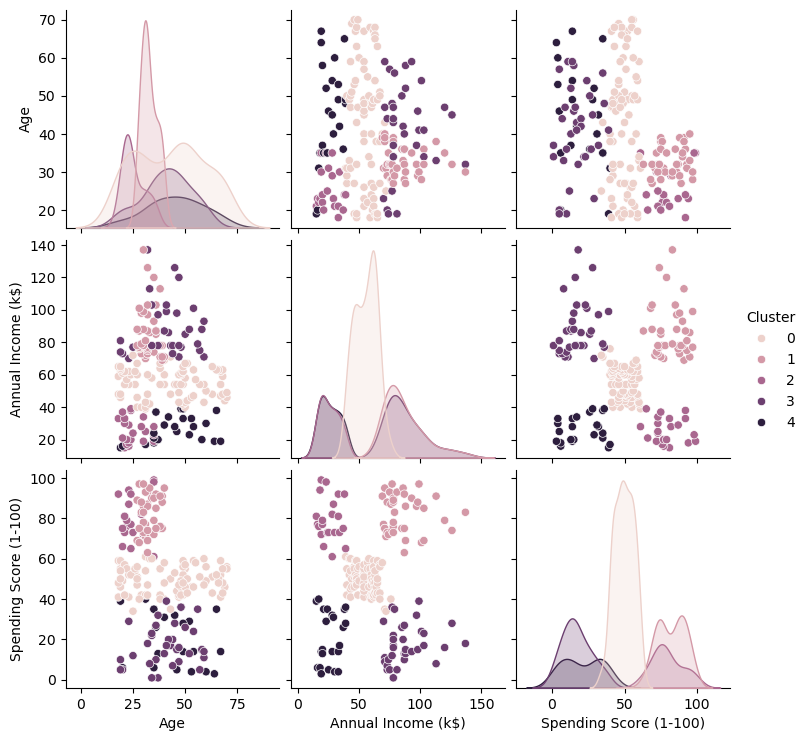

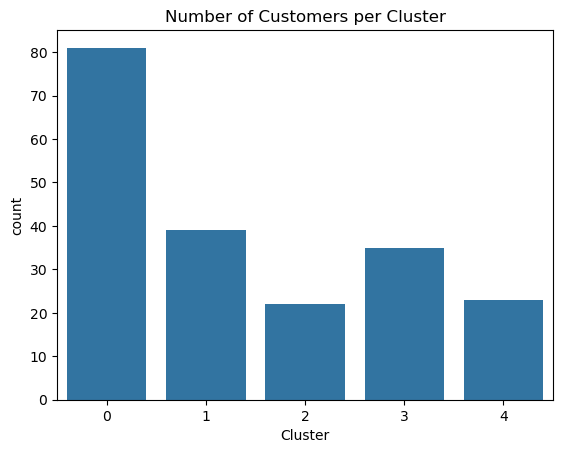

In [141]:
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

sns.countplot(x='Cluster', data=data)
plt.title('Number of Customers per Cluster')
plt.show()


# Interpret Each Segment

Cluster 0: High Income, High Spending → "Luxury Shoppers"

Cluster 1: Low Income, Low Spending → "Budget Customers"

Cluster 2: Average Income, High Spending → "Impulsive Buyers"

Cluster 3: High Income, Low Spending → "Cautious Spenders"

Cluster 4: Low Income, High Spending → "Value Seekers"

In [142]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [143]:
# Save clustered data
data['Cluster'] = kmeans.labels_
data.to_csv("Mall_Customers_Clustered.csv", index=False)


In [145]:


X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Train model again
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Save fresh model
with open(r"C:/Users/Visla/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print(" Model retrained and saved successfully")

with open(r"C:/Users/Visla/kmeans_model.pkl", "rb") as f:  # rb = read binary
    kmeans = pickle.load(f)

print("Cluster centers:\n", kmeans.cluster_centers_)



 Model retrained and saved successfully
Cluster centers:
 [[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]
